In [2]:
import torch

import vcl
import dataset
import coresets
import plots
import importlib
import numpy as np
from models import MultiheadModel, MultiheadModelConvolutional

import sys, os

# Coreset Only

In [16]:
### 120 epochs, 200 coreset size
filename1 = "./files/accuracy/3_accs_Cifar_coresetonly"
filename2 = "./files/accuracy/3_meths_Cifar_coresetonly"

In [17]:
# data = combined_array
# methods = ['Random Coreset Only', 'K-Center Coreset Only', 'QR Coreset Only']
# np.save(filename1, data)
# np.save(filename2, methods)

<Figure size 432x288 with 0 Axes>

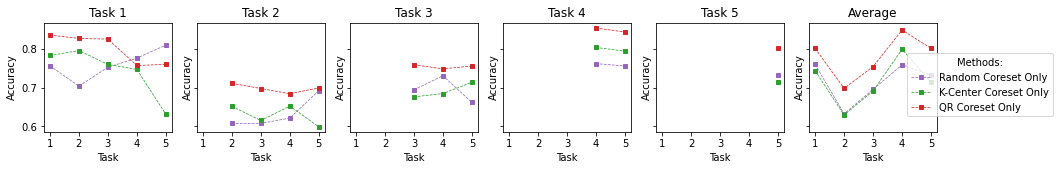

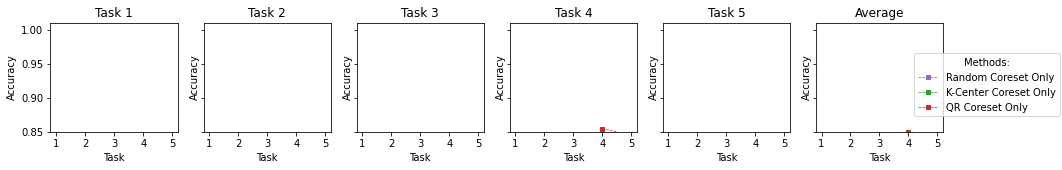

In [18]:
data = np.load("{}.npy".format(filename1)); methods = np.load("{}.npy".format(filename2))
plots.split_plot(data, methods)

# VCL

### Experiments

In [31]:
v = "5" #version

In [32]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

num_epochs = 50
coreset_size = 200

num_tasks = 5
single_head = False
batch_size = 256
class_distribution = [[0, 1],[2, 3],[4, 5],[6, 7],[8, 9]]

dataset_name = "Cifar"
get_dataloader = lambda: dataset.SplitCifar10Dataloader(class_distribution, batch_size, grayscale=False, data_subset=1.0)
get_model = lambda: MultiheadModelConvolutional(32*32).to(device)


In [33]:
data = []; methods = []

In [34]:
# QR Coreset VCL

coreset_method = coresets.attach_qr_coreset_split
model = get_model(); dataloaders = get_dataloader()
all_accs = vcl.run_vcl(num_tasks, single_head, num_epochs, dataloaders,
            model, coreset_method, coreset_size, beta=0.01)
data.append(all_accs); methods.append("VCL + QR")

np.save("./files/accuracy/{v}_accs_{fn}".format(v=v, fn=dataset_name), data)
np.save("./files/accuracy/{v}_meths_{fn}".format(v=v,fn=dataset_name), methods)


Files already downloaded and verified
Files already downloaded and verified


c:\Users\Dell 5520\Downloads\10\dataset.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset.targets = torch.tensor(dataset.targets)


Starting Task 1





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [01:21<1:06:48, 81.81s/it]


  4%|▍         | 2/50 [02:38<1:04:17, 80.37s/it]


  6%|▌         | 3/50 [03:54<1:01:53, 79.01s/it]


  8%|▊         | 4/50 [05:10<59:46, 77.96s/it]  


 10%|█         | 5/50 [06:25<57:53, 77.19s/it]


 12%|█▏        | 6/50 [07:41<56:15, 76.72s/it]


 14%|█▍        | 7/50 [08:56<54:45, 76.40s/it]


 16%|█▌        | 8/50 [10:12<53:21, 76.24s/it]


 18%|█▊        | 9/50 [11:29<52:09, 76.34s/it]


 20%|██        | 10/50 [12:46<51:05, 76.63s/it]


 22%|██▏       | 11/50 [14:02<49:43, 76.49s/it]


 24%|██▍       | 12/50 [15:18<48:16, 76.24s/it]


 26%|██▌       | 13/50 [16:34<46:54, 76.06s/it]


 28%|██▊       | 14/50 [17:49<45:31, 75.88s/it]


 30%|███       | 15/50 [19:04<44:09, 75.69s/it]


 32%|███▏      | 16/50 [20:20<42:52, 75.68s/it]


 34%|███▍      | 17/50 [21:35<41:30, 75.47s/it]


 36%|███▌      | 18/50 [22:51<40:18, 75.57s/it]


 38%|███▊      | 19/50 [24:09<39:24, 76.27s/it]


 40%|██

Done Training Task 1
Replaying Task 1





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:01<01:16,  1.56s/it]


  4%|▍         | 2/50 [00:03<01:13,  1.54s/it]


  6%|▌         | 3/50 [00:04<01:11,  1.53s/it]


  8%|▊         | 4/50 [00:06<01:10,  1.53s/it]


 10%|█         | 5/50 [00:07<01:08,  1.52s/it]


 12%|█▏        | 6/50 [00:09<01:08,  1.55s/it]


 14%|█▍        | 7/50 [00:10<01:06,  1.55s/it]


 16%|█▌        | 8/50 [00:12<01:04,  1.54s/it]


 18%|█▊        | 9/50 [00:13<01:03,  1.54s/it]


 20%|██        | 10/50 [00:15<01:03,  1.58s/it]


 22%|██▏       | 11/50 [00:17<01:00,  1.56s/it]


 24%|██▍       | 12/50 [00:18<00:59,  1.55s/it]


 26%|██▌       | 13/50 [00:20<00:56,  1.54s/it]


 28%|██▊       | 14/50 [00:21<00:55,  1.54s/it]


 30%|███       | 15/50 [00:23<00:53,  1.53s/it]


 32%|███▏      | 16/50 [00:24<00:52,  1.56s/it]


 34%|███▍      | 17/50 [00:26<00:53,  1.63s/it]


 36%|███▌      | 18/50 [00:28<00:53,  1.67s/it]


 38%|███▊      | 19/50 [00:30<00:52,  1.69s/it]


 40%|████      


Task 1 Accuracy: 0.8809344951923077

Starting Task 2





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [01:16<1:02:07, 76.08s/it]


  4%|▍         | 2/50 [02:31<1:00:43, 75.91s/it]


  6%|▌         | 3/50 [03:48<59:40, 76.17s/it]  


  8%|▊         | 4/50 [05:05<58:33, 76.39s/it]


 10%|█         | 5/50 [06:30<59:22, 79.16s/it]


 12%|█▏        | 6/50 [07:49<57:54, 78.97s/it]


 14%|█▍        | 7/50 [09:04<55:43, 77.76s/it]


 16%|█▌        | 8/50 [10:22<54:34, 77.96s/it]


 18%|█▊        | 9/50 [11:39<52:55, 77.46s/it]


 20%|██        | 10/50 [12:55<51:22, 77.07s/it]


 22%|██▏       | 11/50 [14:11<49:54, 76.77s/it]


 24%|██▍       | 12/50 [15:25<48:09, 76.03s/it]


 26%|██▌       | 13/50 [16:51<48:40, 78.94s/it]


 28%|██▊       | 14/50 [18:08<47:03, 78.43s/it]


 30%|███       | 15/50 [19:23<45:06, 77.31s/it]


 32%|███▏      | 16/50 [20:38<43:24, 76.60s/it]


 34%|███▍      | 17/50 [21:53<41:53, 76.16s/it]


 36%|███▌      | 18/50 [23:10<40:46, 76.47s/it]


 38%|███▊      | 19/50 [24:29<39:55, 77.27s/it]


 40%|████

Done Training Task 2
Replaying Task 1





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:01<01:13,  1.51s/it]


  4%|▍         | 2/50 [00:03<01:13,  1.53s/it]


  6%|▌         | 3/50 [00:04<01:12,  1.55s/it]


  8%|▊         | 4/50 [00:06<01:12,  1.57s/it]


 10%|█         | 5/50 [00:07<01:10,  1.57s/it]


 12%|█▏        | 6/50 [00:09<01:08,  1.56s/it]


 14%|█▍        | 7/50 [00:10<01:06,  1.54s/it]


 16%|█▌        | 8/50 [00:12<01:04,  1.53s/it]


 18%|█▊        | 9/50 [00:13<01:03,  1.55s/it]


 20%|██        | 10/50 [00:15<01:03,  1.58s/it]


 22%|██▏       | 11/50 [00:18<01:15,  1.94s/it]


 24%|██▍       | 12/50 [00:21<01:21,  2.13s/it]


 26%|██▌       | 13/50 [00:23<01:21,  2.19s/it]


 28%|██▊       | 14/50 [00:25<01:19,  2.21s/it]


 30%|███       | 15/50 [00:27<01:16,  2.18s/it]


 32%|███▏      | 16/50 [00:29<01:12,  2.13s/it]


 34%|███▍      | 17/50 [00:31<01:08,  2.09s/it]


 36%|███▌      | 18/50 [00:33<01:04,  2.02s/it]


 38%|███▊      | 19/50 [00:35<01:01,  1.97s/it]


 40%|████      

Replaying Task 2





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:01<01:18,  1.61s/it]


  4%|▍         | 2/50 [00:03<01:17,  1.61s/it]


  6%|▌         | 3/50 [00:04<01:14,  1.59s/it]


  8%|▊         | 4/50 [00:06<01:13,  1.60s/it]


 10%|█         | 5/50 [00:07<01:10,  1.58s/it]


 12%|█▏        | 6/50 [00:09<01:09,  1.58s/it]


 14%|█▍        | 7/50 [00:11<01:07,  1.56s/it]


 16%|█▌        | 8/50 [00:12<01:05,  1.56s/it]


 18%|█▊        | 9/50 [00:14<01:04,  1.56s/it]


 20%|██        | 10/50 [00:15<01:01,  1.55s/it]


 22%|██▏       | 11/50 [00:17<01:01,  1.57s/it]


 24%|██▍       | 12/50 [00:18<00:59,  1.56s/it]


 26%|██▌       | 13/50 [00:20<00:57,  1.55s/it]


 28%|██▊       | 14/50 [00:21<00:55,  1.54s/it]


 30%|███       | 15/50 [00:23<00:53,  1.53s/it]


 32%|███▏      | 16/50 [00:24<00:51,  1.53s/it]


 34%|███▍      | 17/50 [00:26<00:51,  1.57s/it]


 36%|███▌      | 18/50 [00:28<00:50,  1.58s/it]


 38%|███▊      | 19/50 [00:29<00:49,  1.60s/it]


 40%|████      


Task 1 Accuracy: 0.8659104567307692
Task 2 Accuracy: 0.7582632211538461

Starting Task 3





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [01:20<1:05:39, 80.40s/it]


  4%|▍         | 2/50 [02:40<1:04:15, 80.33s/it]


  6%|▌         | 3/50 [03:57<1:02:09, 79.36s/it]


  8%|▊         | 4/50 [05:14<1:00:15, 78.59s/it]


 10%|█         | 5/50 [06:32<58:45, 78.35s/it]  


 12%|█▏        | 6/50 [07:49<57:11, 78.00s/it]


 14%|█▍        | 7/50 [09:07<55:59, 78.13s/it]


 16%|█▌        | 8/50 [10:23<54:11, 77.41s/it]


 18%|█▊        | 9/50 [11:43<53:23, 78.14s/it]


 20%|██        | 10/50 [13:02<52:13, 78.34s/it]


 22%|██▏       | 11/50 [14:20<50:57, 78.40s/it]


 24%|██▍       | 12/50 [15:34<48:49, 77.09s/it]


 26%|██▌       | 13/50 [16:50<47:16, 76.66s/it]


 28%|██▊       | 14/50 [18:06<45:53, 76.47s/it]


 30%|███       | 15/50 [19:22<44:31, 76.34s/it]


 32%|███▏      | 16/50 [20:42<43:56, 77.56s/it]


 34%|███▍      | 17/50 [22:04<43:19, 78.77s/it]


 36%|███▌      | 18/50 [23:21<41:41, 78.18s/it]


 38%|███▊      | 19/50 [24:35<39:47, 77.01s/it]


 40%|

Done Training Task 3
Replaying Task 1





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:01<01:16,  1.55s/it]


  4%|▍         | 2/50 [00:03<01:13,  1.53s/it]


  6%|▌         | 3/50 [00:04<01:12,  1.54s/it]


  8%|▊         | 4/50 [00:06<01:10,  1.53s/it]


 10%|█         | 5/50 [00:07<01:10,  1.56s/it]


 12%|█▏        | 6/50 [00:09<01:08,  1.56s/it]


 14%|█▍        | 7/50 [00:10<01:06,  1.55s/it]


 16%|█▌        | 8/50 [00:12<01:04,  1.53s/it]


 18%|█▊        | 9/50 [00:13<01:02,  1.53s/it]


 20%|██        | 10/50 [00:15<01:01,  1.53s/it]


 22%|██▏       | 11/50 [00:16<00:59,  1.52s/it]


 24%|██▍       | 12/50 [00:18<00:58,  1.54s/it]


 26%|██▌       | 13/50 [00:20<01:00,  1.63s/it]


 28%|██▊       | 14/50 [00:22<00:59,  1.66s/it]


 30%|███       | 15/50 [00:23<00:58,  1.67s/it]


 32%|███▏      | 16/50 [00:25<00:57,  1.69s/it]


 34%|███▍      | 17/50 [00:27<00:55,  1.68s/it]


 36%|███▌      | 18/50 [00:28<00:54,  1.71s/it]


 38%|███▊      | 19/50 [00:30<00:52,  1.69s/it]


 40%|████      

Replaying Task 2





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:01<01:13,  1.51s/it]


  4%|▍         | 2/50 [00:03<01:12,  1.52s/it]


  6%|▌         | 3/50 [00:04<01:11,  1.51s/it]


  8%|▊         | 4/50 [00:06<01:09,  1.51s/it]


 10%|█         | 5/50 [00:07<01:08,  1.53s/it]


 12%|█▏        | 6/50 [00:09<01:07,  1.53s/it]


 14%|█▍        | 7/50 [00:10<01:05,  1.53s/it]


 16%|█▌        | 8/50 [00:12<01:04,  1.53s/it]


 18%|█▊        | 9/50 [00:13<01:02,  1.52s/it]


 20%|██        | 10/50 [00:15<01:00,  1.51s/it]


 22%|██▏       | 11/50 [00:16<00:59,  1.52s/it]


 24%|██▍       | 12/50 [00:18<00:57,  1.52s/it]


 26%|██▌       | 13/50 [00:19<00:56,  1.53s/it]


 28%|██▊       | 14/50 [00:21<00:54,  1.53s/it]


 30%|███       | 15/50 [00:22<00:53,  1.53s/it]


 32%|███▏      | 16/50 [00:24<00:51,  1.52s/it]


 34%|███▍      | 17/50 [00:25<00:50,  1.52s/it]


 36%|███▌      | 18/50 [00:27<00:48,  1.52s/it]


 38%|███▊      | 19/50 [00:28<00:46,  1.51s/it]


 40%|████      

Replaying Task 3





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:01<01:13,  1.51s/it]


  4%|▍         | 2/50 [00:03<01:12,  1.51s/it]


  6%|▌         | 3/50 [00:04<01:10,  1.51s/it]


  8%|▊         | 4/50 [00:06<01:09,  1.52s/it]


 10%|█         | 5/50 [00:07<01:08,  1.52s/it]


 12%|█▏        | 6/50 [00:09<01:06,  1.51s/it]


 14%|█▍        | 7/50 [00:10<01:04,  1.51s/it]


 16%|█▌        | 8/50 [00:12<01:03,  1.51s/it]


 18%|█▊        | 9/50 [00:13<01:02,  1.51s/it]


 20%|██        | 10/50 [00:15<01:00,  1.51s/it]


 22%|██▏       | 11/50 [00:16<00:59,  1.53s/it]


 24%|██▍       | 12/50 [00:18<00:57,  1.51s/it]


 26%|██▌       | 13/50 [00:19<00:56,  1.53s/it]


 28%|██▊       | 14/50 [00:21<00:54,  1.52s/it]


 30%|███       | 15/50 [00:22<00:53,  1.53s/it]


 32%|███▏      | 16/50 [00:24<00:52,  1.53s/it]


 34%|███▍      | 17/50 [00:25<00:50,  1.52s/it]


 36%|███▌      | 18/50 [00:27<00:48,  1.52s/it]


 38%|███▊      | 19/50 [00:28<00:46,  1.52s/it]


 40%|████      


Task 1 Accuracy: 0.8123873197115384
Task 2 Accuracy: 0.6956881009615384
Task 3 Accuracy: 0.7862079326923077

Starting Task 4





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [01:14<1:00:35, 74.19s/it]


  4%|▍         | 2/50 [02:27<59:12, 74.02s/it]  


  6%|▌         | 3/50 [03:42<58:06, 74.19s/it]


  8%|▊         | 4/50 [04:56<56:55, 74.24s/it]


 10%|█         | 5/50 [06:11<55:49, 74.43s/it]


 12%|█▏        | 6/50 [07:26<54:42, 74.61s/it]


 14%|█▍        | 7/50 [08:46<54:32, 76.11s/it]


 16%|█▌        | 8/50 [10:01<53:02, 75.78s/it]


 18%|█▊        | 9/50 [11:16<51:35, 75.49s/it]


 20%|██        | 10/50 [12:37<51:31, 77.29s/it]


 22%|██▏       | 11/50 [13:51<49:34, 76.26s/it]


 24%|██▍       | 12/50 [15:04<47:45, 75.41s/it]


 26%|██▌       | 13/50 [16:18<46:10, 74.88s/it]


 28%|██▊       | 14/50 [17:32<44:41, 74.50s/it]


 30%|███       | 15/50 [18:48<43:51, 75.20s/it]


 32%|███▏      | 16/50 [20:02<42:23, 74.82s/it]


 34%|███▍      | 17/50 [21:16<40:59, 74.54s/it]


 36%|███▌      | 18/50 [22:31<39:44, 74.51s/it]


 38%|███▊      | 19/50 [23:50<39:17, 76.06s/it]


 40%|████  

Done Training Task 4
Replaying Task 1





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:01<01:14,  1.53s/it]


  4%|▍         | 2/50 [00:03<01:13,  1.52s/it]


  6%|▌         | 3/50 [00:04<01:11,  1.53s/it]


  8%|▊         | 4/50 [00:06<01:09,  1.51s/it]


 10%|█         | 5/50 [00:07<01:07,  1.50s/it]


 12%|█▏        | 6/50 [00:09<01:07,  1.53s/it]


 14%|█▍        | 7/50 [00:10<01:05,  1.52s/it]


 16%|█▌        | 8/50 [00:12<01:04,  1.53s/it]


 18%|█▊        | 9/50 [00:13<01:02,  1.52s/it]


 20%|██        | 10/50 [00:15<01:00,  1.52s/it]


 22%|██▏       | 11/50 [00:16<00:59,  1.52s/it]


 24%|██▍       | 12/50 [00:18<00:58,  1.55s/it]


 26%|██▌       | 13/50 [00:19<00:56,  1.53s/it]


 28%|██▊       | 14/50 [00:21<00:54,  1.52s/it]


 30%|███       | 15/50 [00:22<00:52,  1.51s/it]


 32%|███▏      | 16/50 [00:24<00:51,  1.51s/it]


 34%|███▍      | 17/50 [00:25<00:49,  1.50s/it]


 36%|███▌      | 18/50 [00:27<00:48,  1.51s/it]


 38%|███▊      | 19/50 [00:28<00:47,  1.53s/it]


 40%|████      

Replaying Task 2





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:01<01:11,  1.47s/it]


  4%|▍         | 2/50 [00:02<01:10,  1.48s/it]


  6%|▌         | 3/50 [00:04<01:10,  1.49s/it]


  8%|▊         | 4/50 [00:06<01:09,  1.51s/it]


 10%|█         | 5/50 [00:07<01:07,  1.49s/it]


 12%|█▏        | 6/50 [00:09<01:07,  1.54s/it]


 14%|█▍        | 7/50 [00:10<01:05,  1.53s/it]


 16%|█▌        | 8/50 [00:12<01:04,  1.53s/it]


 18%|█▊        | 9/50 [00:13<01:02,  1.52s/it]


 20%|██        | 10/50 [00:15<01:00,  1.52s/it]


 22%|██▏       | 11/50 [00:16<01:00,  1.56s/it]


 24%|██▍       | 12/50 [00:18<01:02,  1.66s/it]


 26%|██▌       | 13/50 [00:20<01:00,  1.64s/it]


 28%|██▊       | 14/50 [00:21<00:58,  1.63s/it]


 30%|███       | 15/50 [00:23<00:56,  1.62s/it]


 32%|███▏      | 16/50 [00:25<00:54,  1.60s/it]


 34%|███▍      | 17/50 [00:26<00:52,  1.59s/it]


 36%|███▌      | 18/50 [00:28<00:50,  1.59s/it]


 38%|███▊      | 19/50 [00:29<00:48,  1.57s/it]


 40%|████      

Replaying Task 3





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:01<01:25,  1.75s/it]


  4%|▍         | 2/50 [00:03<01:22,  1.73s/it]


  6%|▌         | 3/50 [00:05<01:20,  1.71s/it]


  8%|▊         | 4/50 [00:06<01:18,  1.70s/it]


 10%|█         | 5/50 [00:08<01:15,  1.68s/it]


 12%|█▏        | 6/50 [00:10<01:13,  1.66s/it]


 14%|█▍        | 7/50 [00:11<01:11,  1.66s/it]


 16%|█▌        | 8/50 [00:13<01:08,  1.63s/it]


 18%|█▊        | 9/50 [00:14<01:05,  1.61s/it]


 20%|██        | 10/50 [00:16<01:03,  1.59s/it]


 22%|██▏       | 11/50 [00:17<01:01,  1.59s/it]


 24%|██▍       | 12/50 [00:19<00:59,  1.57s/it]


 26%|██▌       | 13/50 [00:20<00:57,  1.56s/it]


 28%|██▊       | 14/50 [00:22<00:57,  1.59s/it]


 30%|███       | 15/50 [00:24<00:55,  1.58s/it]


 32%|███▏      | 16/50 [00:25<00:52,  1.56s/it]


 34%|███▍      | 17/50 [00:27<00:51,  1.56s/it]


 36%|███▌      | 18/50 [00:28<00:49,  1.54s/it]


 38%|███▊      | 19/50 [00:30<00:47,  1.53s/it]


 40%|████      

Replaying Task 4





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:01<01:15,  1.54s/it]


  4%|▍         | 2/50 [00:03<01:14,  1.56s/it]


  6%|▌         | 3/50 [00:04<01:13,  1.57s/it]


  8%|▊         | 4/50 [00:06<01:11,  1.56s/it]


 10%|█         | 5/50 [00:07<01:09,  1.55s/it]


 12%|█▏        | 6/50 [00:09<01:08,  1.56s/it]


 14%|█▍        | 7/50 [00:10<01:06,  1.54s/it]


 16%|█▌        | 8/50 [00:12<01:04,  1.53s/it]


 18%|█▊        | 9/50 [00:13<01:02,  1.52s/it]


 20%|██        | 10/50 [00:15<01:00,  1.52s/it]


 22%|██▏       | 11/50 [00:16<00:58,  1.51s/it]


 24%|██▍       | 12/50 [00:18<00:57,  1.51s/it]


 26%|██▌       | 13/50 [00:19<00:56,  1.53s/it]


 28%|██▊       | 14/50 [00:21<00:54,  1.52s/it]


 30%|███       | 15/50 [00:23<00:53,  1.54s/it]


 32%|███▏      | 16/50 [00:24<00:52,  1.56s/it]


 34%|███▍      | 17/50 [00:26<00:51,  1.55s/it]


 36%|███▌      | 18/50 [00:27<00:49,  1.54s/it]


 38%|███▊      | 19/50 [00:29<00:47,  1.54s/it]


 40%|████      


Task 1 Accuracy: 0.8511493389423077
Task 2 Accuracy: 0.7022611177884616
Task 3 Accuracy: 0.75146484375
Task 4 Accuracy: 0.8983999399038461

Starting Task 5





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [01:13<1:00:23, 73.95s/it]


  4%|▍         | 2/50 [02:32<1:00:13, 75.29s/it]


  6%|▌         | 3/50 [03:46<58:41, 74.94s/it]  


  8%|▊         | 4/50 [05:00<57:12, 74.63s/it]


 10%|█         | 5/50 [06:14<55:49, 74.43s/it]


 12%|█▏        | 6/50 [07:27<54:22, 74.15s/it]


 14%|█▍        | 7/50 [08:42<53:09, 74.18s/it]


 16%|█▌        | 8/50 [10:02<53:16, 76.11s/it]


 18%|█▊        | 9/50 [11:29<54:08, 79.24s/it]


 20%|██        | 10/50 [12:44<52:03, 78.10s/it]


 22%|██▏       | 11/50 [13:59<50:03, 77.01s/it]


 24%|██▍       | 12/50 [15:16<48:53, 77.19s/it]


 26%|██▌       | 13/50 [16:35<47:51, 77.60s/it]


 28%|██▊       | 14/50 [17:49<45:55, 76.53s/it]


 30%|███       | 15/50 [19:06<44:43, 76.68s/it]


 32%|███▏      | 16/50 [20:20<42:58, 75.83s/it]


 34%|███▍      | 17/50 [21:33<41:21, 75.21s/it]


 36%|███▌      | 18/50 [22:47<39:50, 74.69s/it]


 38%|███▊      | 19/50 [24:01<38:28, 74.47s/it]


 40%|████

Done Training Task 5
Replaying Task 1





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:01<01:14,  1.52s/it]


  4%|▍         | 2/50 [00:03<01:13,  1.53s/it]


  6%|▌         | 3/50 [00:04<01:11,  1.53s/it]


  8%|▊         | 4/50 [00:06<01:10,  1.52s/it]


 10%|█         | 5/50 [00:07<01:08,  1.53s/it]


 12%|█▏        | 6/50 [00:09<01:06,  1.52s/it]


 14%|█▍        | 7/50 [00:10<01:05,  1.51s/it]


 16%|█▌        | 8/50 [00:12<01:03,  1.50s/it]


 18%|█▊        | 9/50 [00:13<01:02,  1.52s/it]


 20%|██        | 10/50 [00:15<01:00,  1.52s/it]


 22%|██▏       | 11/50 [00:16<00:59,  1.53s/it]


 24%|██▍       | 12/50 [00:18<00:59,  1.55s/it]


 26%|██▌       | 13/50 [00:19<00:57,  1.55s/it]


 28%|██▊       | 14/50 [00:21<00:55,  1.55s/it]


 30%|███       | 15/50 [00:22<00:54,  1.55s/it]


 32%|███▏      | 16/50 [00:24<00:53,  1.56s/it]


 34%|███▍      | 17/50 [00:26<00:51,  1.55s/it]


 36%|███▌      | 18/50 [00:27<00:49,  1.54s/it]


 38%|███▊      | 19/50 [00:29<00:48,  1.56s/it]


 40%|████      

Replaying Task 2





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:01<01:17,  1.59s/it]


  4%|▍         | 2/50 [00:03<01:14,  1.56s/it]


  6%|▌         | 3/50 [00:04<01:12,  1.54s/it]


  8%|▊         | 4/50 [00:06<01:10,  1.53s/it]


 10%|█         | 5/50 [00:07<01:09,  1.54s/it]


 12%|█▏        | 6/50 [00:09<01:07,  1.54s/it]


 14%|█▍        | 7/50 [00:10<01:06,  1.54s/it]


 16%|█▌        | 8/50 [00:12<01:05,  1.56s/it]


 18%|█▊        | 9/50 [00:14<01:05,  1.59s/it]


 20%|██        | 10/50 [00:15<01:02,  1.57s/it]


 22%|██▏       | 11/50 [00:17<01:00,  1.55s/it]


 24%|██▍       | 12/50 [00:18<00:58,  1.54s/it]


 26%|██▌       | 13/50 [00:20<00:56,  1.53s/it]


 28%|██▊       | 14/50 [00:21<00:55,  1.54s/it]


 30%|███       | 15/50 [00:23<00:54,  1.55s/it]


 32%|███▏      | 16/50 [00:24<00:52,  1.54s/it]


 34%|███▍      | 17/50 [00:26<00:50,  1.53s/it]


 36%|███▌      | 18/50 [00:27<00:48,  1.53s/it]


 38%|███▊      | 19/50 [00:29<00:46,  1.51s/it]


 40%|████      

Replaying Task 3





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:01<01:15,  1.55s/it]


  4%|▍         | 2/50 [00:03<01:13,  1.54s/it]


  6%|▌         | 3/50 [00:04<01:11,  1.53s/it]


  8%|▊         | 4/50 [00:06<01:10,  1.52s/it]


 10%|█         | 5/50 [00:07<01:08,  1.52s/it]


 12%|█▏        | 6/50 [00:09<01:07,  1.52s/it]


 14%|█▍        | 7/50 [00:10<01:05,  1.53s/it]


 16%|█▌        | 8/50 [00:12<01:04,  1.53s/it]


 18%|█▊        | 9/50 [00:13<01:02,  1.53s/it]


 20%|██        | 10/50 [00:15<01:00,  1.52s/it]


 22%|██▏       | 11/50 [00:16<00:59,  1.52s/it]


 24%|██▍       | 12/50 [00:18<00:58,  1.54s/it]


 26%|██▌       | 13/50 [00:19<00:56,  1.54s/it]


 28%|██▊       | 14/50 [00:21<00:54,  1.52s/it]


 30%|███       | 15/50 [00:22<00:52,  1.51s/it]


 32%|███▏      | 16/50 [00:24<00:51,  1.51s/it]


 34%|███▍      | 17/50 [00:25<00:49,  1.51s/it]


 36%|███▌      | 18/50 [00:27<00:48,  1.52s/it]


 38%|███▊      | 19/50 [00:28<00:47,  1.53s/it]


 40%|████      

Replaying Task 4





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:01<01:16,  1.57s/it]


  4%|▍         | 2/50 [00:03<01:14,  1.55s/it]


  6%|▌         | 3/50 [00:04<01:13,  1.56s/it]


  8%|▊         | 4/50 [00:06<01:11,  1.55s/it]


 10%|█         | 5/50 [00:07<01:09,  1.55s/it]


 12%|█▏        | 6/50 [00:09<01:07,  1.54s/it]


 14%|█▍        | 7/50 [00:10<01:06,  1.55s/it]


 16%|█▌        | 8/50 [00:12<01:04,  1.54s/it]


 18%|█▊        | 9/50 [00:13<01:03,  1.55s/it]


 20%|██        | 10/50 [00:15<01:02,  1.55s/it]


 22%|██▏       | 11/50 [00:17<01:04,  1.65s/it]


 24%|██▍       | 12/50 [00:18<01:01,  1.62s/it]


 26%|██▌       | 13/50 [00:20<00:59,  1.62s/it]


 28%|██▊       | 14/50 [00:22<00:59,  1.66s/it]


 30%|███       | 15/50 [00:24<00:59,  1.71s/it]


 32%|███▏      | 16/50 [00:25<00:57,  1.69s/it]


 34%|███▍      | 17/50 [00:27<00:54,  1.66s/it]


 36%|███▌      | 18/50 [00:28<00:52,  1.63s/it]


 38%|███▊      | 19/50 [00:30<00:49,  1.60s/it]


 40%|████      

Replaying Task 5





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:01<01:13,  1.51s/it]


  4%|▍         | 2/50 [00:03<01:12,  1.52s/it]


  6%|▌         | 3/50 [00:04<01:11,  1.52s/it]


  8%|▊         | 4/50 [00:06<01:11,  1.55s/it]


 10%|█         | 5/50 [00:07<01:09,  1.55s/it]


 12%|█▏        | 6/50 [00:09<01:07,  1.54s/it]


 14%|█▍        | 7/50 [00:10<01:07,  1.56s/it]


 16%|█▌        | 8/50 [00:12<01:06,  1.58s/it]


 18%|█▊        | 9/50 [00:14<01:05,  1.60s/it]


 20%|██        | 10/50 [00:15<01:03,  1.60s/it]


 22%|██▏       | 11/50 [00:17<01:02,  1.61s/it]


 24%|██▍       | 12/50 [00:18<01:00,  1.60s/it]


 26%|██▌       | 13/50 [00:20<00:58,  1.58s/it]


 28%|██▊       | 14/50 [00:22<00:57,  1.60s/it]


 30%|███       | 15/50 [00:23<00:55,  1.57s/it]


 32%|███▏      | 16/50 [00:25<00:53,  1.56s/it]


 34%|███▍      | 17/50 [00:26<00:51,  1.55s/it]


 36%|███▌      | 18/50 [00:28<00:49,  1.56s/it]


 38%|███▊      | 19/50 [00:29<00:48,  1.55s/it]


 40%|████      


Task 1 Accuracy: 0.8629807692307692
Task 2 Accuracy: 0.6918194110576923
Task 3 Accuracy: 0.7224684495192308
Task 4 Accuracy: 0.8007061298076923
Task 5 Accuracy: 0.8681640625

[[0.8809345         nan        nan        nan        nan]
 [0.86591046 0.75826322        nan        nan        nan]
 [0.81238732 0.6956881  0.78620793        nan        nan]
 [0.85114934 0.70226112 0.75146484 0.89839994        nan]
 [0.86298077 0.69181941 0.72246845 0.80070613 0.86816406]]


In [35]:
# # K-Center Coreset VCL
coreset_method = coresets.attach_kCenter_coreset_split

model = get_model(); dataloaders = get_dataloader()
all_accs = vcl.run_vcl(num_tasks, single_head, num_epochs, dataloaders,
            model, coreset_method, coreset_size, beta=0.01)
data.append(all_accs); methods.append("VCL + K-Center")

np.save("./files/accuracy/{v}_accs_{fn}".format(v=v, fn=dataset_name), data)
np.save("./files/accuracy/{v}_meths_{fn}".format(v=v,fn=dataset_name), methods)

Files already downloaded and verified
Files already downloaded and verified
Starting Task 1





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [01:15<1:01:48, 75.68s/it]


  4%|▍         | 2/50 [02:42<1:03:17, 79.10s/it]


  6%|▌         | 3/50 [03:57<1:00:57, 77.82s/it]


  8%|▊         | 4/50 [05:12<59:02, 77.00s/it]  


 10%|█         | 5/50 [06:27<57:19, 76.42s/it]


 12%|█▏        | 6/50 [07:43<55:57, 76.31s/it]


 14%|█▍        | 7/50 [08:59<54:27, 75.99s/it]


 16%|█▌        | 8/50 [10:14<52:58, 75.69s/it]


 18%|█▊        | 9/50 [11:28<51:24, 75.23s/it]


 20%|██        | 10/50 [12:45<50:34, 75.86s/it]


 22%|██▏       | 11/50 [13:59<49:01, 75.43s/it]


 24%|██▍       | 12/50 [15:15<47:50, 75.53s/it]


 26%|██▌       | 13/50 [16:30<46:21, 75.18s/it]


 28%|██▊       | 14/50 [17:44<44:54, 74.84s/it]


 30%|███       | 15/50 [18:58<43:36, 74.75s/it]


 32%|███▏      | 16/50 [20:14<42:35, 75.16s/it]


 34%|███▍      | 17/50 [21:29<41:19, 75.13s/it]


 36%|███▌      | 18/50 [22:44<40:02, 75.07s/it]


 38%|███▊      | 19/50 [23:59<38:44, 74.97s/it]


 40%|██

Done Training Task 1
Replaying Task 1





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:01<01:19,  1.62s/it]


  4%|▍         | 2/50 [00:03<01:17,  1.61s/it]


  6%|▌         | 3/50 [00:04<01:15,  1.60s/it]


  8%|▊         | 4/50 [00:06<01:13,  1.60s/it]


 10%|█         | 5/50 [00:08<01:12,  1.61s/it]


 12%|█▏        | 6/50 [00:09<01:10,  1.59s/it]


 14%|█▍        | 7/50 [00:11<01:08,  1.58s/it]


 16%|█▌        | 8/50 [00:12<01:06,  1.59s/it]


 18%|█▊        | 9/50 [00:14<01:04,  1.58s/it]


 20%|██        | 10/50 [00:15<01:03,  1.59s/it]


 22%|██▏       | 11/50 [00:17<01:02,  1.60s/it]


 24%|██▍       | 12/50 [00:19<01:00,  1.58s/it]


 26%|██▌       | 13/50 [00:20<00:58,  1.57s/it]


 28%|██▊       | 14/50 [00:22<00:56,  1.57s/it]


 30%|███       | 15/50 [00:23<00:54,  1.56s/it]


 32%|███▏      | 16/50 [00:25<00:53,  1.57s/it]


 34%|███▍      | 17/50 [00:26<00:52,  1.58s/it]


 36%|███▌      | 18/50 [00:28<00:50,  1.58s/it]


 38%|███▊      | 19/50 [00:30<00:48,  1.56s/it]


 40%|████      


Task 1 Accuracy: 0.8544921875

Starting Task 2





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [01:17<1:03:00, 77.15s/it]


  4%|▍         | 2/50 [02:37<1:02:31, 78.15s/it]


  6%|▌         | 3/50 [03:54<1:00:55, 77.77s/it]


  8%|▊         | 4/50 [05:13<59:48, 78.01s/it]  


 10%|█         | 5/50 [06:32<58:48, 78.42s/it]


 12%|█▏        | 6/50 [07:51<57:33, 78.49s/it]


 14%|█▍        | 7/50 [09:07<55:42, 77.73s/it]


 16%|█▌        | 8/50 [10:24<54:15, 77.51s/it]


 18%|█▊        | 9/50 [11:40<52:46, 77.23s/it]


 20%|██        | 10/50 [12:58<51:31, 77.28s/it]


 22%|██▏       | 11/50 [14:14<50:05, 77.07s/it]


 24%|██▍       | 12/50 [15:31<48:41, 76.89s/it]


 26%|██▌       | 13/50 [16:47<47:18, 76.70s/it]


 28%|██▊       | 14/50 [18:06<46:25, 77.38s/it]


 30%|███       | 15/50 [19:22<44:53, 76.95s/it]


 32%|███▏      | 16/50 [20:38<43:25, 76.62s/it]


 34%|███▍      | 17/50 [21:55<42:13, 76.76s/it]


 36%|███▌      | 18/50 [23:11<40:53, 76.66s/it]


 38%|███▊      | 19/50 [24:28<39:37, 76.70s/it]


 40%|██

Done Training Task 2
Replaying Task 1





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:01<01:16,  1.56s/it]


  4%|▍         | 2/50 [00:03<01:14,  1.56s/it]


  6%|▌         | 3/50 [00:04<01:13,  1.56s/it]


  8%|▊         | 4/50 [00:06<01:11,  1.55s/it]


 10%|█         | 5/50 [00:07<01:10,  1.56s/it]


 12%|█▏        | 6/50 [00:09<01:08,  1.57s/it]


 14%|█▍        | 7/50 [00:10<01:07,  1.56s/it]


 16%|█▌        | 8/50 [00:12<01:05,  1.56s/it]


 18%|█▊        | 9/50 [00:14<01:04,  1.57s/it]


 20%|██        | 10/50 [00:15<01:02,  1.55s/it]


 22%|██▏       | 11/50 [00:17<01:00,  1.56s/it]


 24%|██▍       | 12/50 [00:18<01:01,  1.61s/it]


 26%|██▌       | 13/50 [00:20<00:59,  1.60s/it]


 28%|██▊       | 14/50 [00:21<00:56,  1.57s/it]


 30%|███       | 15/50 [00:23<00:55,  1.57s/it]


 32%|███▏      | 16/50 [00:25<00:53,  1.57s/it]


 34%|███▍      | 17/50 [00:26<00:51,  1.57s/it]


 36%|███▌      | 18/50 [00:28<00:50,  1.58s/it]


 38%|███▊      | 19/50 [00:29<00:48,  1.56s/it]


 40%|████      

Replaying Task 2





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:01<01:15,  1.53s/it]


  4%|▍         | 2/50 [00:03<01:14,  1.55s/it]


  6%|▌         | 3/50 [00:04<01:13,  1.56s/it]


  8%|▊         | 4/50 [00:06<01:11,  1.56s/it]


 10%|█         | 5/50 [00:07<01:09,  1.55s/it]


 12%|█▏        | 6/50 [00:09<01:08,  1.56s/it]


 14%|█▍        | 7/50 [00:10<01:07,  1.57s/it]


 16%|█▌        | 8/50 [00:12<01:06,  1.57s/it]


 18%|█▊        | 9/50 [00:14<01:04,  1.57s/it]


 20%|██        | 10/50 [00:15<01:02,  1.56s/it]


 22%|██▏       | 11/50 [00:17<01:00,  1.56s/it]


 24%|██▍       | 12/50 [00:18<00:58,  1.55s/it]


 26%|██▌       | 13/50 [00:20<00:57,  1.55s/it]


 28%|██▊       | 14/50 [00:21<00:56,  1.57s/it]


 30%|███       | 15/50 [00:23<00:55,  1.57s/it]


 32%|███▏      | 16/50 [00:25<00:53,  1.58s/it]


 34%|███▍      | 17/50 [00:26<00:52,  1.58s/it]


 36%|███▌      | 18/50 [00:28<00:50,  1.57s/it]


 38%|███▊      | 19/50 [00:29<00:49,  1.58s/it]


 40%|████      


Task 1 Accuracy: 0.8395057091346154
Task 2 Accuracy: 0.7593524639423077

Starting Task 3





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [01:17<1:03:35, 77.87s/it]


  4%|▍         | 2/50 [02:40<1:03:28, 79.34s/it]


  6%|▌         | 3/50 [03:59<1:01:59, 79.15s/it]


  8%|▊         | 4/50 [05:17<1:00:30, 78.93s/it]


 10%|█         | 5/50 [06:37<59:26, 79.26s/it]  


 12%|█▏        | 6/50 [07:54<57:33, 78.48s/it]


 14%|█▍        | 7/50 [09:13<56:26, 78.75s/it]


 16%|█▌        | 8/50 [10:34<55:33, 79.37s/it]


 18%|█▊        | 9/50 [11:53<54:09, 79.24s/it]


 20%|██        | 10/50 [13:15<53:25, 80.14s/it]


 22%|██▏       | 11/50 [14:33<51:31, 79.27s/it]


 24%|██▍       | 12/50 [15:49<49:41, 78.46s/it]


 26%|██▌       | 13/50 [17:12<49:06, 79.65s/it]


 28%|██▊       | 14/50 [18:27<47:06, 78.52s/it]


 30%|███       | 15/50 [19:43<45:14, 77.56s/it]


 32%|███▏      | 16/50 [21:05<44:39, 78.82s/it]


 34%|███▍      | 17/50 [22:24<43:32, 79.16s/it]


 36%|███▌      | 18/50 [23:40<41:42, 78.21s/it]


 38%|███▊      | 19/50 [24:57<40:06, 77.62s/it]


 40%|

Done Training Task 3
Replaying Task 1





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:01<01:18,  1.61s/it]


  4%|▍         | 2/50 [00:03<01:16,  1.60s/it]


  6%|▌         | 3/50 [00:04<01:14,  1.60s/it]


  8%|▊         | 4/50 [00:06<01:12,  1.59s/it]


 10%|█         | 5/50 [00:07<01:11,  1.59s/it]


 12%|█▏        | 6/50 [00:09<01:09,  1.59s/it]


 14%|█▍        | 7/50 [00:11<01:07,  1.57s/it]


 16%|█▌        | 8/50 [00:12<01:06,  1.57s/it]


 18%|█▊        | 9/50 [00:14<01:04,  1.57s/it]


 20%|██        | 10/50 [00:15<01:02,  1.57s/it]


 22%|██▏       | 11/50 [00:17<01:00,  1.55s/it]


 24%|██▍       | 12/50 [00:18<00:59,  1.56s/it]


 26%|██▌       | 13/50 [00:20<00:57,  1.56s/it]


 28%|██▊       | 14/50 [00:21<00:55,  1.55s/it]


 30%|███       | 15/50 [00:23<00:54,  1.56s/it]


 32%|███▏      | 16/50 [00:25<00:52,  1.55s/it]


 34%|███▍      | 17/50 [00:26<00:51,  1.57s/it]


 36%|███▌      | 18/50 [00:28<00:50,  1.57s/it]


 38%|███▊      | 19/50 [00:29<00:48,  1.56s/it]


 40%|████      

Replaying Task 2





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:01<01:26,  1.77s/it]


  4%|▍         | 2/50 [00:03<01:23,  1.73s/it]


  6%|▌         | 3/50 [00:05<01:19,  1.70s/it]


  8%|▊         | 4/50 [00:06<01:17,  1.68s/it]


 10%|█         | 5/50 [00:08<01:15,  1.68s/it]


 12%|█▏        | 6/50 [00:09<01:12,  1.64s/it]


 14%|█▍        | 7/50 [00:11<01:12,  1.68s/it]


 16%|█▌        | 8/50 [00:13<01:10,  1.69s/it]


 18%|█▊        | 9/50 [00:15<01:08,  1.67s/it]


 20%|██        | 10/50 [00:16<01:05,  1.64s/it]


 22%|██▏       | 11/50 [00:18<01:02,  1.60s/it]


 24%|██▍       | 12/50 [00:19<01:00,  1.58s/it]


 26%|██▌       | 13/50 [00:21<00:58,  1.59s/it]


 28%|██▊       | 14/50 [00:22<00:56,  1.58s/it]


 30%|███       | 15/50 [00:24<00:55,  1.58s/it]


 32%|███▏      | 16/50 [00:25<00:52,  1.56s/it]


 34%|███▍      | 17/50 [00:27<00:51,  1.56s/it]


 36%|███▌      | 18/50 [00:28<00:49,  1.55s/it]


 38%|███▊      | 19/50 [00:30<00:48,  1.56s/it]


 40%|████      

Replaying Task 3





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:01<01:31,  1.87s/it]


  4%|▍         | 2/50 [00:03<01:28,  1.84s/it]


  6%|▌         | 3/50 [00:05<01:24,  1.80s/it]


  8%|▊         | 4/50 [00:07<01:21,  1.77s/it]


 10%|█         | 5/50 [00:08<01:17,  1.73s/it]


 12%|█▏        | 6/50 [00:10<01:14,  1.69s/it]


 14%|█▍        | 7/50 [00:11<01:11,  1.67s/it]


 16%|█▌        | 8/50 [00:13<01:09,  1.65s/it]


 18%|█▊        | 9/50 [00:15<01:06,  1.62s/it]


 20%|██        | 10/50 [00:16<01:04,  1.62s/it]


 22%|██▏       | 11/50 [00:18<01:02,  1.61s/it]


 24%|██▍       | 12/50 [00:19<01:00,  1.59s/it]


 26%|██▌       | 13/50 [00:21<00:58,  1.59s/it]


 28%|██▊       | 14/50 [00:22<00:56,  1.57s/it]


 30%|███       | 15/50 [00:24<00:54,  1.56s/it]


 32%|███▏      | 16/50 [00:25<00:52,  1.55s/it]


 34%|███▍      | 17/50 [00:27<00:51,  1.56s/it]


 36%|███▌      | 18/50 [00:29<00:49,  1.56s/it]


 38%|███▊      | 19/50 [00:30<00:48,  1.57s/it]


 40%|████      


Task 1 Accuracy: 0.8444636418269231
Task 2 Accuracy: 0.7255483774038461
Task 3 Accuracy: 0.7756535456730769

Starting Task 4





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [01:16<1:02:51, 76.98s/it]


  4%|▍         | 2/50 [02:33<1:01:22, 76.71s/it]


  6%|▌         | 3/50 [03:50<1:00:19, 77.01s/it]


  8%|▊         | 4/50 [05:07<58:55, 76.86s/it]  


 10%|█         | 5/50 [06:25<57:50, 77.12s/it]


 12%|█▏        | 6/50 [07:41<56:24, 76.92s/it]


 14%|█▍        | 7/50 [08:57<54:53, 76.60s/it]


 16%|█▌        | 8/50 [10:15<53:55, 77.05s/it]


 18%|█▊        | 9/50 [11:31<52:23, 76.66s/it]


 20%|██        | 10/50 [12:52<52:06, 78.15s/it]


 22%|██▏       | 11/50 [14:13<51:19, 78.97s/it]


 24%|██▍       | 12/50 [15:30<49:31, 78.19s/it]


 26%|██▌       | 13/50 [16:45<47:46, 77.47s/it]


 28%|██▊       | 14/50 [18:03<46:29, 77.49s/it]


 30%|███       | 15/50 [19:19<44:57, 77.08s/it]


 32%|███▏      | 16/50 [20:35<43:26, 76.65s/it]


 34%|███▍      | 17/50 [21:50<41:59, 76.35s/it]


 36%|███▌      | 18/50 [23:11<41:28, 77.75s/it]


 38%|███▊      | 19/50 [24:28<39:56, 77.31s/it]


 40%|██

Done Training Task 4
Replaying Task 1





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:03<02:47,  3.43s/it]


  4%|▍         | 2/50 [00:06<02:44,  3.43s/it]


  6%|▌         | 3/50 [00:10<02:41,  3.45s/it]


  8%|▊         | 4/50 [00:13<02:37,  3.43s/it]


 10%|█         | 5/50 [00:17<02:34,  3.42s/it]


 12%|█▏        | 6/50 [00:20<02:31,  3.45s/it]


 14%|█▍        | 7/50 [00:24<02:29,  3.47s/it]


 16%|█▌        | 8/50 [00:28<02:33,  3.66s/it]


 18%|█▊        | 9/50 [00:31<02:28,  3.61s/it]


 20%|██        | 10/50 [00:35<02:22,  3.55s/it]


 22%|██▏       | 11/50 [00:38<02:16,  3.50s/it]


 24%|██▍       | 12/50 [00:42<02:13,  3.50s/it]


 26%|██▌       | 13/50 [00:45<02:10,  3.52s/it]


 28%|██▊       | 14/50 [00:49<02:06,  3.53s/it]


 30%|███       | 15/50 [00:52<02:02,  3.51s/it]


 32%|███▏      | 16/50 [00:56<01:59,  3.51s/it]


 34%|███▍      | 17/50 [00:59<01:54,  3.46s/it]


 36%|███▌      | 18/50 [01:02<01:49,  3.44s/it]


 38%|███▊      | 19/50 [01:06<01:46,  3.45s/it]


 40%|████      

Replaying Task 2





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:03<02:52,  3.52s/it]


  4%|▍         | 2/50 [00:06<02:47,  3.49s/it]


  6%|▌         | 3/50 [00:10<02:49,  3.60s/it]


  8%|▊         | 4/50 [00:14<02:42,  3.54s/it]


 10%|█         | 5/50 [00:17<02:41,  3.59s/it]


 12%|█▏        | 6/50 [00:21<02:37,  3.58s/it]


 14%|█▍        | 7/50 [00:24<02:32,  3.54s/it]


 16%|█▌        | 8/50 [00:28<02:30,  3.57s/it]


 18%|█▊        | 9/50 [00:32<02:30,  3.66s/it]


 20%|██        | 10/50 [00:36<02:30,  3.77s/it]


 22%|██▏       | 11/50 [00:40<02:24,  3.71s/it]


 24%|██▍       | 12/50 [00:43<02:19,  3.66s/it]


 26%|██▌       | 13/50 [00:47<02:13,  3.61s/it]


 28%|██▊       | 14/50 [00:50<02:07,  3.55s/it]


 30%|███       | 15/50 [00:53<02:02,  3.50s/it]


 32%|███▏      | 16/50 [00:57<01:57,  3.45s/it]


 34%|███▍      | 17/50 [01:00<01:54,  3.48s/it]


 36%|███▌      | 18/50 [01:04<01:50,  3.47s/it]


 38%|███▊      | 19/50 [01:07<01:47,  3.46s/it]


 40%|████      

Replaying Task 3





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:03<02:50,  3.48s/it]


  4%|▍         | 2/50 [00:07<02:48,  3.51s/it]


  6%|▌         | 3/50 [00:10<02:43,  3.48s/it]


  8%|▊         | 4/50 [00:13<02:39,  3.47s/it]


 10%|█         | 5/50 [00:17<02:35,  3.45s/it]


 12%|█▏        | 6/50 [00:20<02:30,  3.42s/it]


 14%|█▍        | 7/50 [00:24<02:27,  3.42s/it]


 16%|█▌        | 8/50 [00:27<02:24,  3.43s/it]


 18%|█▊        | 9/50 [00:31<02:21,  3.46s/it]


 20%|██        | 10/50 [00:34<02:18,  3.47s/it]


 22%|██▏       | 11/50 [00:38<02:18,  3.55s/it]


 24%|██▍       | 12/50 [00:42<02:16,  3.60s/it]


 26%|██▌       | 13/50 [00:45<02:12,  3.58s/it]


 28%|██▊       | 14/50 [00:49<02:09,  3.58s/it]


 30%|███       | 15/50 [00:52<02:02,  3.51s/it]


 32%|███▏      | 16/50 [00:56<02:02,  3.59s/it]


 34%|███▍      | 17/50 [00:59<01:57,  3.55s/it]


 36%|███▌      | 18/50 [01:03<01:52,  3.51s/it]


 38%|███▊      | 19/50 [01:06<01:48,  3.51s/it]


 40%|████      

Replaying Task 4





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:03<02:48,  3.43s/it]


  4%|▍         | 2/50 [00:06<02:44,  3.43s/it]


  6%|▌         | 3/50 [00:10<02:41,  3.43s/it]


  8%|▊         | 4/50 [00:13<02:40,  3.50s/it]


 10%|█         | 5/50 [00:17<02:36,  3.47s/it]


 12%|█▏        | 6/50 [00:20<02:31,  3.45s/it]


 14%|█▍        | 7/50 [00:24<02:28,  3.45s/it]


 16%|█▌        | 8/50 [00:27<02:24,  3.45s/it]


 18%|█▊        | 9/50 [00:31<02:20,  3.42s/it]


 20%|██        | 10/50 [00:34<02:18,  3.46s/it]


 22%|██▏       | 11/50 [00:38<02:16,  3.49s/it]


 24%|██▍       | 12/50 [00:42<02:17,  3.61s/it]


 26%|██▌       | 13/50 [00:45<02:11,  3.56s/it]


 28%|██▊       | 14/50 [00:48<02:06,  3.51s/it]


 30%|███       | 15/50 [00:52<02:02,  3.49s/it]


 32%|███▏      | 16/50 [00:55<01:58,  3.49s/it]


 34%|███▍      | 17/50 [00:59<01:55,  3.49s/it]


 36%|███▌      | 18/50 [01:02<01:49,  3.44s/it]


 38%|███▊      | 19/50 [01:05<01:45,  3.41s/it]


 40%|████      


Task 1 Accuracy: 0.8148662860576923
Task 2 Accuracy: 0.7169471153846154
Task 3 Accuracy: 0.7738882211538461
Task 4 Accuracy: 0.9082406850961539

Starting Task 5





  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# # Random Coreset VCL
coreset_method = coresets.attach_random_coreset_split

model = get_model(); dataloaders = get_dataloader()
all_accs = vcl.run_vcl(num_tasks, single_head, num_epochs, dataloaders,
            model, coreset_method, coreset_size, beta=0.01)
data.append(all_accs); methods.append("VCL + Random")

np.save("./files/accuracy/{v}_accs_{fn}".format(v=v, fn=dataset_name), data)
np.save("./files/accuracy/{v}_meths_{fn}".format(v=v,fn=dataset_name), methods)


In [ ]:
# # Vanilla VCL - no coreset
dataloaders = get_dataloader(); model = get_model()
all_accs = vcl.run_vanilla_vcl(model, dataloaders, num_tasks, num_epochs, device)
data.append(all_accs); methods.append("VCL")

np.save("./files/accuracy/{v}_accs_{fn}".format(v=v, fn=dataset_name), data)
np.save("./files/accuracy/{v}_meths_{fn}".format(v=v,fn=dataset_name), methods)

Files already downloaded and verified
Files already downloaded and verified
Starting Task 1





  0%|          | 0/20 [00:00<?, ?it/s]


  5%|▌         | 1/20 [01:10<22:19, 70.50s/it]


 10%|█         | 2/20 [02:20<21:05, 70.30s/it]


 15%|█▌        | 3/20 [03:30<19:52, 70.15s/it]


 20%|██        | 4/20 [04:40<18:42, 70.14s/it]


 25%|██▌       | 5/20 [05:50<17:30, 70.03s/it]


 30%|███       | 6/20 [06:59<16:20, 70.01s/it]


 35%|███▌      | 7/20 [08:09<15:09, 69.94s/it]


 40%|████      | 8/20 [09:19<13:58, 69.86s/it]


 45%|████▌     | 9/20 [10:29<12:50, 70.04s/it]


 50%|█████     | 10/20 [11:39<11:39, 69.96s/it]


 55%|█████▌    | 11/20 [12:49<10:29, 69.99s/it]


 60%|██████    | 12/20 [13:59<09:19, 69.90s/it]


 65%|██████▌   | 13/20 [15:09<08:09, 69.92s/it]


 70%|███████   | 14/20 [16:18<06:58, 69.81s/it]


 75%|███████▌  | 15/20 [17:28<05:48, 69.72s/it]


 80%|████████  | 16/20 [18:38<04:39, 69.91s/it]


 85%|████████▌ | 17/20 [19:49<03:30, 70.07s/it]


 90%|█████████ | 18/20 [20:59<02:20, 70.17s/it]


 95%|█████████▌| 19/20 [22:09<01:10, 70.06s/it]


100%|██████████

Done Training Task 1

Task 1 Accuracy: 0.8513371394230769

Starting Task 2





  0%|          | 0/20 [00:00<?, ?it/s]


  5%|▌         | 1/20 [01:10<22:13, 70.18s/it]


 10%|█         | 2/20 [02:20<21:03, 70.17s/it]


 15%|█▌        | 3/20 [03:30<19:53, 70.21s/it]


 20%|██        | 4/20 [04:41<18:47, 70.44s/it]


 25%|██▌       | 5/20 [05:52<17:37, 70.49s/it]


 30%|███       | 6/20 [07:02<16:26, 70.46s/it]


 35%|███▌      | 7/20 [08:13<15:16, 70.50s/it]


 40%|████      | 8/20 [09:23<14:06, 70.51s/it]


 45%|████▌     | 9/20 [10:33<12:54, 70.38s/it]


 50%|█████     | 10/20 [11:45<11:47, 70.80s/it]


 55%|█████▌    | 11/20 [12:55<10:35, 70.60s/it]


 60%|██████    | 12/20 [14:05<09:22, 70.33s/it]


 65%|██████▌   | 13/20 [15:16<08:12, 70.41s/it]


 70%|███████   | 14/20 [16:26<07:02, 70.47s/it]


 75%|███████▌  | 15/20 [17:37<05:53, 70.62s/it]


 80%|████████  | 16/20 [18:47<04:41, 70.46s/it]


 85%|████████▌ | 17/20 [19:58<03:31, 70.54s/it]


 90%|█████████ | 18/20 [21:08<02:20, 70.39s/it]


 95%|█████████▌| 19/20 [22:18<01:10, 70.20s/it]


100%|██████████

Done Training Task 2

Task 1 Accuracy: 0.8114483173076923
Task 2 Accuracy: 0.7434269831730769

Starting Task 3





  0%|          | 0/20 [00:00<?, ?it/s]


  5%|▌         | 1/20 [01:09<22:07, 69.88s/it]


 10%|█         | 2/20 [02:19<20:56, 69.81s/it]


 15%|█▌        | 3/20 [03:29<19:47, 69.85s/it]


 20%|██        | 4/20 [04:39<18:39, 69.97s/it]


 25%|██▌       | 5/20 [05:50<17:32, 70.18s/it]


 30%|███       | 6/20 [07:00<16:23, 70.23s/it]


 35%|███▌      | 7/20 [08:11<15:15, 70.39s/it]


 40%|████      | 8/20 [09:21<14:03, 70.30s/it]


 45%|████▌     | 9/20 [10:32<12:54, 70.41s/it]


 50%|█████     | 10/20 [11:42<11:43, 70.35s/it]


 55%|█████▌    | 11/20 [12:52<10:32, 70.29s/it]


 60%|██████    | 12/20 [14:02<09:22, 70.27s/it]


 65%|██████▌   | 13/20 [15:13<08:12, 70.32s/it]


 70%|███████   | 14/20 [16:23<07:02, 70.36s/it]


 75%|███████▌  | 15/20 [17:33<05:50, 70.13s/it]


 80%|████████  | 16/20 [18:43<04:40, 70.06s/it]


 85%|████████▌ | 17/20 [19:53<03:30, 70.03s/it]


 90%|█████████ | 18/20 [21:03<02:20, 70.12s/it]


 95%|█████████▌| 19/20 [22:13<01:10, 70.06s/it]


100%|██████████

Done Training Task 3

Task 1 Accuracy: 0.6448317307692308
Task 2 Accuracy: 0.68798828125
Task 3 Accuracy: 0.7625075120192308

Starting Task 4





  0%|          | 0/20 [00:00<?, ?it/s]


  5%|▌         | 1/20 [01:09<22:02, 69.60s/it]


 10%|█         | 2/20 [02:19<20:55, 69.74s/it]


 15%|█▌        | 3/20 [03:29<19:48, 69.89s/it]


 20%|██        | 4/20 [04:40<18:39, 69.99s/it]


 25%|██▌       | 5/20 [05:50<17:30, 70.02s/it]


 30%|███       | 6/20 [07:00<16:22, 70.16s/it]


 35%|███▌      | 7/20 [08:11<15:14, 70.31s/it]


 40%|████      | 8/20 [09:22<14:06, 70.56s/it]


 45%|████▌     | 9/20 [10:32<12:53, 70.36s/it]


 50%|█████     | 10/20 [11:41<11:41, 70.12s/it]


 55%|█████▌    | 11/20 [12:51<10:30, 70.01s/it]


 60%|██████    | 12/20 [14:02<09:21, 70.17s/it]


 65%|██████▌   | 13/20 [15:12<08:11, 70.24s/it]


 70%|███████   | 14/20 [16:22<07:01, 70.25s/it]


 75%|███████▌  | 15/20 [17:33<05:51, 70.23s/it]


 80%|████████  | 16/20 [18:43<04:40, 70.17s/it]


 85%|████████▌ | 17/20 [19:53<03:30, 70.18s/it]


 90%|█████████ | 18/20 [21:03<02:20, 70.07s/it]


 95%|█████████▌| 19/20 [22:13<01:10, 70.07s/it]


100%|██████████

Done Training Task 4

Task 1 Accuracy: 0.7462815504807692
Task 2 Accuracy: 0.6668795072115384
Task 3 Accuracy: 0.7024113581730769
Task 4 Accuracy: 0.8660982572115384

Starting Task 5





  0%|          | 0/20 [00:00<?, ?it/s]


  5%|▌         | 1/20 [01:09<22:03, 69.64s/it]


 10%|█         | 2/20 [02:19<20:54, 69.71s/it]


 15%|█▌        | 3/20 [03:29<19:48, 69.92s/it]


 20%|██        | 4/20 [04:40<18:40, 70.02s/it]


 25%|██▌       | 5/20 [05:51<17:35, 70.38s/it]


 30%|███       | 6/20 [07:01<16:24, 70.34s/it]


 35%|███▌      | 7/20 [08:11<15:13, 70.29s/it]


 40%|████      | 8/20 [09:21<14:01, 70.15s/it]


 45%|████▌     | 9/20 [10:31<12:51, 70.16s/it]


 50%|█████     | 10/20 [11:43<11:47, 70.70s/it]


 55%|█████▌    | 11/20 [12:54<10:36, 70.77s/it]


 60%|██████    | 12/20 [14:05<09:26, 70.86s/it]


 65%|██████▌   | 13/20 [15:16<08:16, 70.93s/it]


 70%|███████   | 14/20 [16:28<07:06, 71.00s/it]


 75%|███████▌  | 15/20 [17:39<05:55, 71.03s/it]


 80%|████████  | 16/20 [18:50<04:44, 71.08s/it]


 85%|████████▌ | 17/20 [20:02<03:33, 71.31s/it]


 90%|█████████ | 18/20 [21:13<02:22, 71.27s/it]


 95%|█████████▌| 19/20 [22:24<01:11, 71.17s/it]


100%|██████████

Done Training Task 5

Task 1 Accuracy: 0.6792367788461539
Task 2 Accuracy: 0.6474984975961539
Task 3 Accuracy: 0.7112004206730769
Task 4 Accuracy: 0.8342097355769231
Task 5 Accuracy: 0.8418344350961539

[[0.85133714        nan        nan        nan        nan]
 [0.81144832 0.74342698        nan        nan        nan]
 [0.64483173 0.68798828 0.76250751        nan        nan]
 [0.74628155 0.66687951 0.70241136 0.86609826        nan]
 [0.67923678 0.6474985  0.71120042 0.83420974 0.84183444]]


['VCL + QR', 'VCL + Random', 'VCL + K-Center', 'VCL', 'QR Coreset Only', 'Random Coreset Only', 'K-Center Coreset Only']
[[[0.8433743990384616, nan, nan, nan, nan], [0.8335336538461539, 0.7377554086538461, nan, nan, nan], [0.7961989182692308, 0.7183368389423077, 0.7609299879807692, nan, nan], [0.8096078725961539, 0.7408353365384616, 0.7487980769230769, 0.8659104567307692, nan], [0.8161433293269231, 0.7209660456730769, 0.7274263822115384, 0.8550555889423077, 0.8442007211538461]], [[0.8088566706730769, nan, nan, nan, nan], [0.7980769230769231, 0.71875, nan, nan, nan], [0.7885366586538461, 0.7167217548076923, 0.7600285456730769, nan, nan], [0.7714092548076923, 0.7150315504807692, 0.7668269230769231, 0.8591871995192308, nan], [0.8079552283653846, 0.7058668870192308, 0.74169921875, 0.8415339543269231, 0.8367262620192308]], [[0.8371769831730769, nan, nan, nan, nan], [0.8294396033653846, 0.7341496394230769, nan, nan, nan], [0.7817758413461539, 0.7220177283653846, 0.748046875, nan, nan], [0.70

<Figure size 432x288 with 0 Axes>

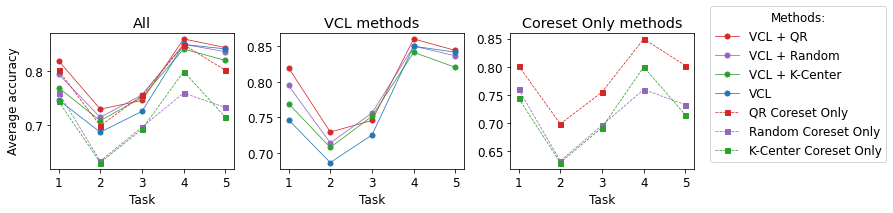

In [56]:
importlib.reload(plots)

filename1 = "./files/accuracy/4_accs_Cifar"; filename2 = "./files/accuracy/4_meths_Cifar"
data1 = np.load("{}.npy".format(filename1)).tolist(); methods1 = np.load("{}.npy".format(filename2)).tolist()

filename1 = "./files/accuracy/3_accs_Cifar_coresetonly"; filename2 = "./files/accuracy/3_meths_Cifar_coresetonly"
data2 = np.load("{}.npy".format(filename1)).tolist(); methods2 = np.load("{}.npy".format(filename2)).tolist()

m2 = [methods2[2], methods2[0], methods2[1]]
d2 = [data2[2], data2[0], data2[1]]
print(methods1 +m2)
print(data1)

d = data1 + data2
print(len(d[0]))
plots.split_three_mean_plot(data1, d2, methods1, m2)
